### **Exemplos Sparse Regression**

---

Gabriel Oukawa <br>
Álgebra linear para ciência de dados <br>
2º Semestre de 2025

---


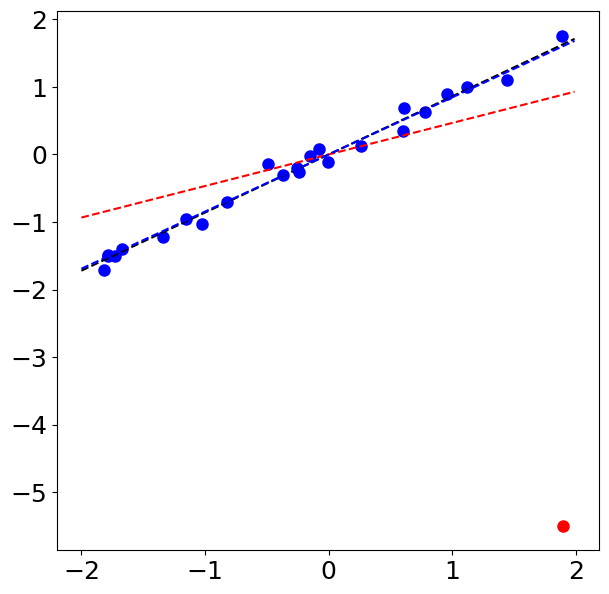

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize

plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams.update({'font.size': 18})

x = np.sort(4*(np.random.rand(25,1)-0.5),axis=0) # Random data from [-2,2]
b = 0.9*x + 0.1*np.random.randn(len(x),1)  # Line y = 0.9x with noise
atrue = np.linalg.lstsq(x,b,rcond=None)[0] # Least-squares slope (no outliers)
atrue = atrue.item(0)

b[-1] = -5.5  # Introduce outlier
acorrupt = np.linalg.lstsq(x,b,rcond=None)[0] # New slope
acorrupt = acorrupt.item(0)

## L1 optimization to reject outlier
def L1_norm(a):
    return np.linalg.norm(a*x-b,ord=1)

a0 = acorrupt   # initialize to L2 solution
res = minimize(L1_norm, a0)
aL1 = res.x[0]  # aL1 is robust

plt.plot(x[:-1],b[:-1],'o',color='b',ms=8) # Data
plt.plot(x[-1],b[-1],'o',color='r',ms=8)   # Outlier

xgrid = np.arange(-2,2,0.01)
plt.plot(xgrid,atrue*xgrid,'--',color='k')    # L2 fit (no outlier)
plt.plot(xgrid,acorrupt*xgrid,'--',color='r') # L2 fit (outlier)
plt.plot(xgrid,aL1*xgrid,'--',color='b')      # L1 fit

plt.show()

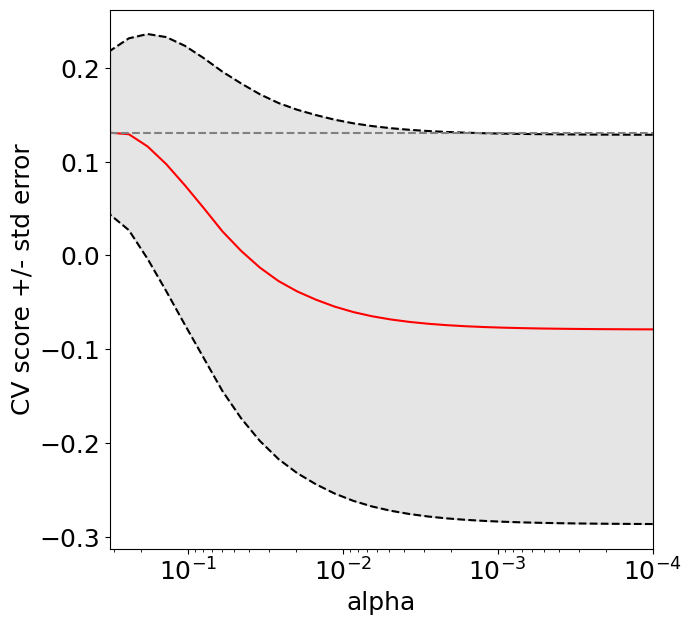

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
from sklearn import linear_model
from sklearn import model_selection

plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams.update({'font.size': 18})

A = np.random.randn(100,10) # Matrix of possible predictors
x = np.array([0, 0, 1, 0, 0, 0, -1, 0, 0, 0]) #Two nonzero predictors
b = A @ x + 2*np.random.randn(100)

xL2 = np.linalg.pinv(A) @ b

reg = linear_model.LassoCV(cv=10).fit(A, b)

lasso = linear_model.Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]

clf = model_selection.GridSearchCV(lasso, tuned_parameters, cv=10, refit=False)
clf.fit(A, b)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores,'r-')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(10)

plt.semilogx(alphas, scores + std_error, 'k--')
plt.semilogx(alphas, scores - std_error, 'k--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.1,color='k')

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[-1], alphas[0]])

plt.show()

XL1 = linear_model.Lasso(alpha=clf.best_params_['alpha'])
XL1.fit(A,b)
xL1 = XL1.coef_
xL1DeBiased = np.linalg.pinv(A[:,np.abs(xL1)>0]) @ b